## Import Libraries and Files 

In [410]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [350]:
# Import Files
bike = pd.read_pickle(r'../Data/Prepared/bike_final.pkl')

In [352]:
bike.shape

(895485, 15)

## Visualisations

##### Average Temperature

In [354]:
# Sate date as Index
bike = bike.set_index('date')

In [356]:
# Sort Index
bike = bike.sort_index()

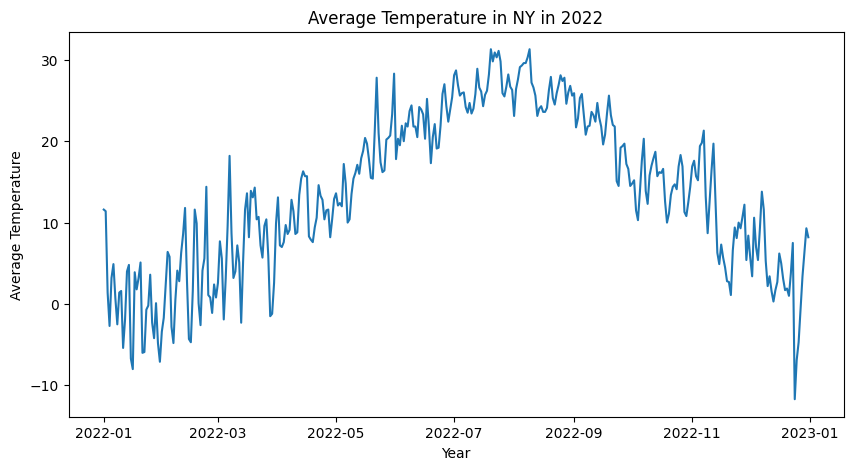

In [358]:
# Plot avg temperature 
plt.figure(figsize=(10,5)) #Set figure
plt.plot(bike['avg_temp'])
# Set title and labels
plt.title('Average Temperature in NY in 2022')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
# Show plot
plt.show()

##### Trips per Day

In [360]:
# Count of trips per day
bike['trips_per_day'] = bike.groupby('date').agg({'ride_id':['count']})

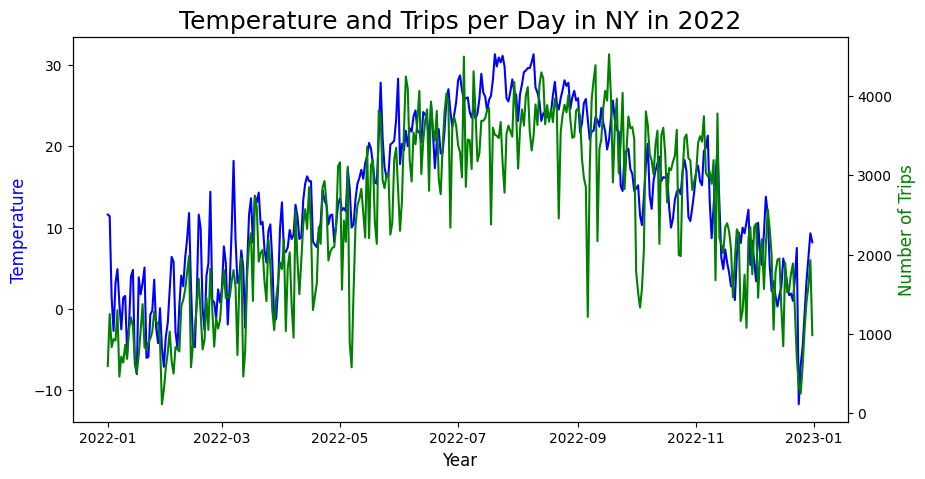

In [362]:
# Plot temperature and trips per day on dual axis
# Create figure and axes
fig, ax = plt.subplots(figsize=(10,5))
# Make plot of temperature
ax.plot(bike['avg_temp'], color='blue')
ax.set_xlabel('Year', fontsize=12) # Set x label
ax.set_ylabel('Temperature', color='blue', fontsize=12) # Set y label
# Make plot of trips per day
ax2 = ax.twinx()
ax2.plot(bike['trips_per_day'], color='green')
ax2.set_xlabel('Year', fontsize=12) # Set x label
ax2.set_ylabel('Number of Trips', color='green', fontsize=12) # Set y label
# Set title
plt.title('Temperature and Trips per Day in NY in 2022', fontsize=18)
# Show plot
plt.show()

Given the complexity of the graph, I preferred to use an object-oriented approach, so that both axes of temperature and number of trips made to NY in 2022 could be displayed on a single graph

##### Trip Duration

In [364]:
# Convert to datetime
bike['start_time'] = pd.to_datetime(bike['start_time'])
bike['end_time'] = pd.to_datetime(bike['end_time'])

In [366]:
# Calculate trip duration
bike['trip_duration'] = bike['end_time'] - bike['start_time']

In [368]:
# Calculate trip duration in minutes
bike['trip_mins'] = bike['trip_duration'].dt.total_seconds() / 60

In [370]:
bike['trip_mins'].describe()

count    895485.000000
mean         17.542010
std         126.700135
min         -55.516667
25%           4.516667
50%           7.200000
75%          12.250000
max       28541.500000
Name: trip_mins, dtype: float64

In [372]:
# Flag trip duration
bike.loc[bike['trip_mins'] <= 0, 'trip_leng'] = 'No Trip'
bike.loc[(bike['trip_mins'] >0 ) & (bike['trip_mins'] <1440) , 'trip_leng'] = 'Day Trip'
bike.loc[bike['trip_mins'] >=140, 'trip_leng'] = 'Day+'

In [374]:
bike['trip_leng'].value_counts()

Day Trip    888719
Day+          6716
No Trip         50
Name: trip_leng, dtype: int64

In [376]:
# Check the values with no trips
bike2 = bike[bike['trip_leng'] == 'No Trip']

In [378]:
# List for printing
to_p = ['start_time', 'end_time', 'trip_leng', 'trip_mins']

In [380]:
t_p = bike2[to_p]

In [382]:
print(t_p)

                    start_time            end_time trip_leng  trip_mins
date                                                                   
2022-01-10 2022-01-10 14:33:09 2022-01-10 14:33:09   No Trip   0.000000
2022-01-28 2022-01-28 08:55:30 2022-01-28 08:55:30   No Trip   0.000000
2022-02-10 2022-02-10 16:22:13 2022-02-10 16:22:13   No Trip   0.000000
2022-03-28 2022-03-28 11:35:53 2022-03-28 11:35:53   No Trip   0.000000
2022-04-02 2022-04-02 16:01:38 2022-04-02 16:01:38   No Trip   0.000000
2022-04-19 2022-04-19 17:35:56 2022-04-19 17:35:56   No Trip   0.000000
2022-04-21 2022-04-21 06:24:27 2022-04-21 06:24:27   No Trip   0.000000
2022-04-30 2022-04-30 18:23:16 2022-04-30 18:23:16   No Trip   0.000000
2022-05-02 2022-05-02 23:04:41 2022-05-02 23:04:41   No Trip   0.000000
2022-05-11 2022-05-11 17:45:30 2022-05-11 17:45:29   No Trip  -0.016667
2022-05-12 2022-05-12 18:16:07 2022-05-12 18:16:07   No Trip   0.000000
2022-05-17 2022-05-17 20:04:12 2022-05-17 20:04:12   No Trip   0

In [384]:
# Check shape of bike2 (No trip values)
bike2.shape

(50, 18)

In [386]:
# Exclude no trip values
bike = bike[bike['trip_leng'] != 'No Trip']

In [388]:
# Check shape of bike
bike.shape

(895435, 18)

In [390]:
# Select only day trips for plotting
day_trip = bike[bike['trip_leng'] != 'Day+']

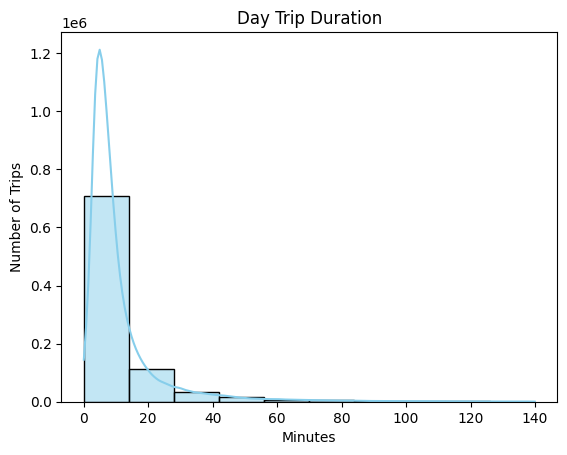

In [420]:
# Make plot of duration of day trips
sns.histplot(day_trip['trip_mins'], bins=10, kde=True, color='skyblue')
plt.title('Day Trip Duration')
plt.xlabel('Minutes')
plt.ylabel('Number of Trips')
plt.show()

## Save File

In [424]:
# Save File
bike.to_pickle(r'../Data/Prepared/bike_flag.pkl')